<a href="https://colab.research.google.com/github/Jaysons-s/DataSctructures/blob/main/Arbol%20Binario%20de%20Recorridos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Inorder: [30, 40, 50, 60, 70, 80, 90]
Preorder: [50, 30, 40, 70, 60, 90, 80]
Postorder: [40, 30, 60, 80, 90, 70, 50]


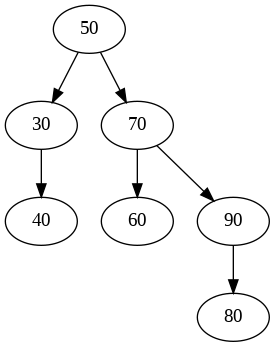

In [1]:
!apt-get install graphviz -y
!pip install graphviz

import graphviz

# Clase para representar un nodo del arbol binario
class Nodo:
    def __init__(self, clave):
        self.izquierdo = None
        self.derecho = None
        self.clave = clave

# Clase para el arbol Binario
class ArbolBinario:
    def __init__(self):
        self.raiz = None

    def insertar(self, clave):
        if self.raiz is None:
            self.raiz = Nodo(clave)
        else:
            self._insertar(self.raiz, clave)

    def _insertar(self, actual, clave):
        if clave < actual.clave:
            if actual.izquierdo is None:
                actual.izquierdo = Nodo(clave)
            else:
                self._insertar(actual.izquierdo, clave)
        else:
            if actual.derecho is None:
                actual.derecho = Nodo(clave)
            else:
                self._insertar(actual.derecho, clave)

    # Recorrido en Inorder
    def inorder(self):
        return self._inorder(self.raiz)

    def _inorder(self, nodo):
        return self._inorder(nodo.izquierdo) + [nodo.clave] + self._inorder(nodo.derecho) if nodo else []

    # Recorrido en Preorder
    def preorder(self):
        return self._preorder(self.raiz)

    def _preorder(self, nodo):
        return [nodo.clave] + self._preorder(nodo.izquierdo) + self._preorder(nodo.derecho) if nodo else []

    # Recorrido en postorde Postorder
    def postorder(self):
        return self._postorder(self.raiz)

    def _postorder(self, nodo):
        return self._postorder(nodo.izquierdo) + self._postorder(nodo.derecho) + [nodo.clave] if nodo else []

    # Metodo para generar una representación grafica del arbol
    def generar_grafico(self):
        dot = graphviz.Digraph()
        if self.raiz:
            self._agregar_nodo(dot, self.raiz)
        return dot

    def _agregar_nodo(self, dot, nodo):
        dot.node(str(nodo.clave), str(nodo.clave))
        if nodo.izquierdo:
            dot.edge(str(nodo.clave), str(nodo.izquierdo.clave))
            self._agregar_nodo(dot, nodo.izquierdo)
        if nodo.derecho:
            dot.edge(str(nodo.clave), str(nodo.derecho.clave))
            self._agregar_nodo(dot, nodo.derecho)

# Ejemplo de uso
if __name__ == "__main__":
    arbol = ArbolBinario()
    arbol.insertar(50)
    arbol.insertar(30)
    arbol.insertar(70)
    arbol.insertar(90)
    arbol.insertar(40)
    arbol.insertar(60)
    arbol.insertar(80)

    #recorridos
    print("Inorder:", arbol.inorder())        # [90, 30, 40, 50, 60, 70, 80]
    print("Preorder:", arbol.preorder())      # [50, 30, 20, 40, 70, 60, 80]
    print("Postorder:", arbol.postorder())    # [20, 40, 30, 60, 80, 70, 50]

    # Generar el grafico y mostrarlo
    dot = arbol.generar_grafico()
    dot.render("arbol_binario", format="png", cleanup=False)

    from IPython.display import Image
    display(Image(filename='arbol_binario.png'))
